<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_4X/blob/main/GQtest_data(y_hat)_multi_delta_(4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_4X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.623820,30.724864,56.053287,42.571750,-1854.432939,-1626.459219,40.467945,-1666.927164
1,0.0,1.0,54.906817,37.069651,73.693980,58.904931,2314.502225,2549.077604,381.317481,2167.760122
2,0.0,2.0,68.373450,25.428939,77.940633,93.569881,1307.831760,1583.144664,1194.129266,389.015398
3,0.0,3.0,95.271244,61.934277,95.897697,73.447122,3340.914933,3677.465272,-1514.564820,5192.030092
4,0.0,4.0,55.961012,69.510410,66.532998,35.875472,-6594.188328,-6356.308436,-1340.696860,-5015.611576
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,44.200091,72.309630,44.689406,53.115463,-2748.699338,-2524.384747,996.351782,-3520.736529
59996,999.0,56.0,88.702089,20.336177,34.889659,24.985824,-397.164917,-218.251169,772.806955,-991.058124
59997,999.0,57.0,33.596217,41.264699,33.007945,95.471826,-535.015355,-321.674668,-343.097415,21.422748
59998,999.0,58.0,35.689761,95.952809,50.570372,28.861898,-3852.562000,-3631.487159,1717.254281,-5348.741440


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.623820,30.724864,56.053287,42.571750,-1854.432939,-1626.459219,40.467945,-1666.927164
1,0.0,1.0,54.906817,37.069651,73.693980,58.904931,2314.502225,2549.077604,381.317481,2167.760122
2,0.0,2.0,68.373450,25.428939,77.940633,93.569881,1307.831760,1583.144664,1194.129266,389.015398
3,0.0,3.0,95.271244,61.934277,95.897697,73.447122,3340.914933,3677.465272,-1514.564820,5192.030092
4,0.0,4.0,55.961012,69.510410,66.532998,35.875472,-6594.188328,-6356.308436,-1340.696860,-5015.611576
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,44.200091,72.309630,44.689406,53.115463,-2748.699338,-2524.384747,996.351782,-3520.736529
59996,999.0,56.0,88.702089,20.336177,34.889659,24.985824,-397.164917,-218.251169,772.806955,-991.058124
59997,999.0,57.0,33.596217,41.264699,33.007945,95.471826,-535.015355,-321.674668,-343.097415,21.422748
59998,999.0,58.0,35.689761,95.952809,50.570372,28.861898,-3852.562000,-3631.487159,1717.254281,-5348.741440


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,88.623820,30.724864,56.053287,42.571750,-1854.432939,-1626.459219,40.467945,-1666.927164
1,0.0,1.0,54.906817,37.069651,73.693980,58.904931,2314.502225,2549.077604,381.317481,2167.760122
2,0.0,2.0,68.373450,25.428939,77.940633,93.569881,1307.831760,1583.144664,1194.129266,389.015398
3,0.0,3.0,95.271244,61.934277,95.897697,73.447122,3340.914933,3677.465272,-1514.564820,5192.030092
4,0.0,4.0,55.961012,69.510410,66.532998,35.875472,-6594.188328,-6356.308436,-1340.696860,-5015.611576
...,...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,44.200091,72.309630,44.689406,53.115463,-2748.699338,-2524.384747,996.351782,-3520.736529
59996,999.0,56.0,88.702089,20.336177,34.889659,24.985824,-397.164917,-218.251169,772.806955,-991.058124
59997,999.0,57.0,33.596217,41.264699,33.007945,95.471826,-535.015355,-321.674668,-343.097415,21.422748
59998,999.0,58.0,35.689761,95.952809,50.570372,28.861898,-3852.562000,-3631.487159,1717.254281,-5348.741440


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    88.623820  30.724864  56.053287  42.571750 -1854.432939   
      1.0    54.906817  37.069651  73.693980  58.904931  2314.502225   
      2.0    68.373450  25.428939  77.940633  93.569881  1307.831760   
      3.0    95.271244  61.934277  95.897697  73.447122  3340.914933   
      4.0    55.961012  69.510410  66.532998  35.875472 -6594.188328   
...                ...        ...        ...        ...          ...   
999.0 55.0   44.200091  72.309630  44.689406  53.115463 -2748.699338   
      56.0   88.702089  20.336177  34.889659  24.985824  -397.164917   
      57.0   33.596217  41.264699  33.007945  95.471826  -535.015355   
      58.0   35.689761  95.952809  50.570372  28.861898 -3852.562000   
      59.0   62.164793  94.263595  77.423411  92.700660  2442.258906   

                       Y        y_hat        e_hat  
rep   index                                         
0.0   0.0   -1626.459219    40.467945 -1666.927164  
      1.0    2549.077604   381.317481  2167.760122  
      2.0    1583.144664  1194.129266   389.015398  
      3.0    3677.465272 -1514.564820  5192.030092  
      4.0   -6356.308436 -1340.696860 -5015.611576  
...                  ...          ...          ...  
999.0 55.0  -2524.384747   996.351782 -3520.736529  
      56.0   -218.251169   772.806955  -991.058124  
      57.0   -321.674668  -343.097415    21.422748  
      58.0  -3631.487159  1717.254281 -5348.741440  
      59.0   2778.811364   933.055723  1845.755641  

[60000 rows x 8 columns]

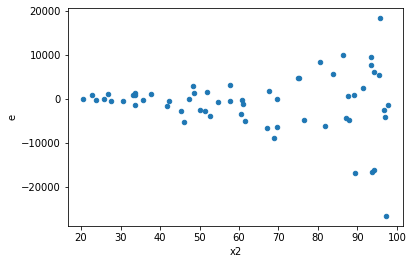

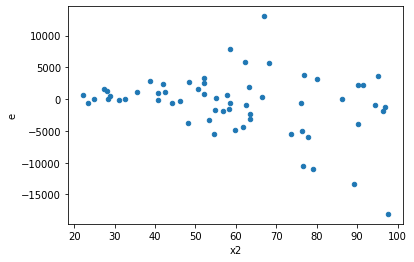

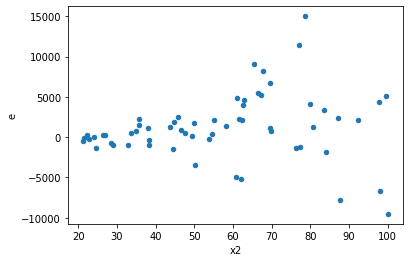

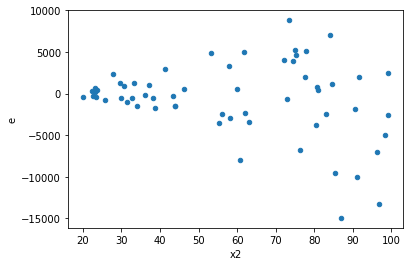

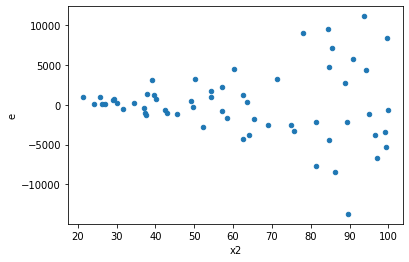

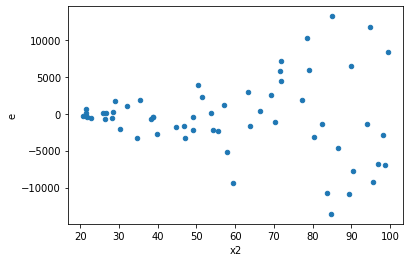

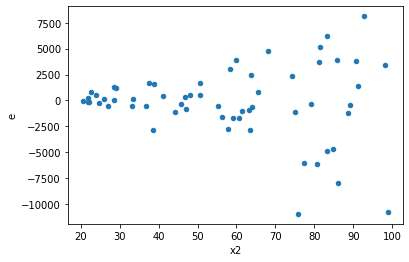

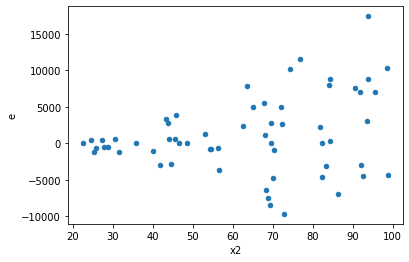

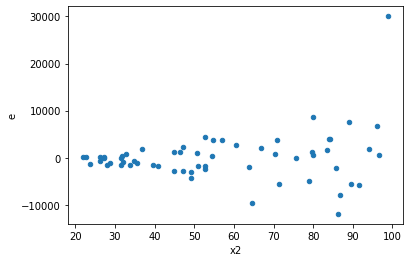

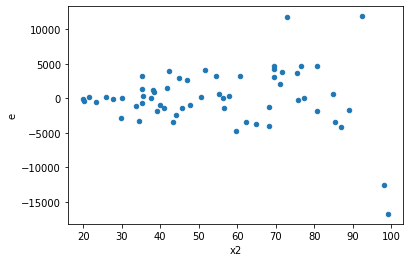

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,20.0,20.0,278251557.3465338,906799422.501195,13912577.867326688,45339971.125059746,3.258919486915465,0.011105884202059935,0.99444705789897,0.005552942101029967,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,326774806.95123786,488564462.08014303,16338740.347561892,24428223.10400715,1.495110552243545,0.376021144585422,0.811989427707289,0.188010572292711,Reject005=1 : Homoscedasticity
8.0,20.0,20.0,343382195.4291125,1110442304.6350014,17169109.771455623,55522115.23175007,3.2338377452777403,0.011616648014745712,0.9941916759926271,0.005808324007372856,Reject005=0 : Heteroscedasticity
9.0,20.0,20.0,304592663.4141071,843780249.8949779,15229633.170705354,42189012.4947489,2.770192296942562,0.02747885042734799,0.986260574786326,0.013739425213673995,Reject005=0 : Heteroscedasticity
12.0,20.0,20.0,170776553.17631096,439508286.72068304,8538827.658815548,21975414.336034153,2.573586821763123,0.04027095124122981,0.9798645243793851,0.020135475620614907,Reject005=0 : Heteroscedasticity
16.0,20.0,20.0,194231002.2812631,309928005.6950124,9711550.114063155,15496400.28475062,1.5956670256286385,0.30425877221577147,0.8478706138921143,0.15212938610788573,Reject005=1 : Homoscedasticity
17.0,20.0,20.0,270652733.24693525,798574822.7274368,13532636.662346762,39928741.136371836,2.9505514802942767,0.019525815407372527,0.9902370922963137,0.009762907703686263,Reject005=0 : Heteroscedasticity
18.0,20.0,20.0,97361135.07820866,607753252.3290924,4868056.753910433,30387662.61645462,6.242257260465317,0.00014008490692196673,0.999929957546539,7.004245346098337e-05,Reject005=0 : Heteroscedasticity
20.0,20.0,20.0,267121657.28839174,647365824.5965579,13356082.864419587,32368291.229827892,2.423486853024591,0.05427719805579656,0.9728614009721017,0.02713859902789828,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,20.0,20.0,469530948.3650838,403136913.79980236,23476547.41825419,20156845.68999012,0.8585949769733672,0.7364843515125087,Reject005=1 : Homoscedasticity
1.0,20.0,20.0,278251557.3465338,906799422.501195,13912577.867326688,45339971.125059746,3.258919486915465,0.011105884202059935,Reject005=0 : Heteroscedasticity
2.0,20.0,20.0,408295868.7273262,205343163.7528131,20414793.436366312,10267158.187640656,0.5029273609671231,0.13273074503548152,Reject005=1 : Homoscedasticity
3.0,20.0,20.0,553875416.0858849,122404443.77755299,27693770.804294247,6120222.18887765,0.2209963472337482,0.001399594642775966,Reject005=0 : Heteroscedasticity
4.0,20.0,20.0,326774806.95123786,488564462.08014303,16338740.347561892,24428223.10400715,1.495110552243545,0.376021144585422,Reject005=1 : Homoscedasticity
5.0,20.0,20.0,449488366.1865122,391056781.20911443,22474418.30932561,19552839.06045572,0.8700042328722876,0.7585392955558903,Reject005=1 : Homoscedasticity
6.0,20.0,20.0,241271203.94244343,38528547.09811694,12063560.197122172,1926427.354905847,0.15968978671531864,0.00013677347188576627,Reject005=0 : Heteroscedasticity
7.0,20.0,20.0,718473177.6998595,56044656.986300066,35923658.88499297,2802232.8493150035,0.07800521818465518,3.9474748740047834e-07,Reject005=0 : Heteroscedasticity
8.0,20.0,20.0,343382195.4291125,1110442304.6350014,17169109.771455623,55522115.23175007,3.2338377452777403,0.011616648014745712,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    598
Reject005=1 : Homoscedasticity      402
Name: Result_test, dtype: int64